# Supervised Machine Learning in Python

In [ ]:
# Import Packages
# First, you will need to import some packages. 
# You will need pandas for loading in data, numpy for square-rooting your model estimates, 
# sklearn for the bulk of the linear regression and modeling work, 
# and matplotlib to graph the model's residuals to get a visual representation of accuracy.



In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

# Load in Data

In [7]:
realestate = pd.read_csv("/Users/nehag/Documents/GitHub/DS-Student-Resources/DS106-Machine-Learning/ML/MLEg/realestate.csv")
realestate.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [ ]:
#Goal

# With the above data, your goal is to accurately predict housing prices.
# This variable is conveniently labeled Y house price of unit area for you.
# You will use X variables numbered 2-6 to determine housing prices. When completed, if desired, 
# you should be able to take completely new data, maybe from a new geographic location, 
# and predict housing prices there.



In [10]:
# Data Wrangling

# The first thing you need to do to kick off machine learning is to create 
# your x and y variables as their own arrays. You cannot feed in the entire dataframe all at once, 
# so you will need to subset your data. The x data will consist of X2-X6.
# You are going to skip X1 since it is a date, and dates can sometimes be tricky to format correctly
# for machine learning.

x = realestate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# The y data will consist of the target variable, or what you are trying to predict. In this case, that is 
# housing price:

y =  realestate['Y house price of unit area']



# Train Test Split

In [ ]:
#One of the key things that separates machine learning from statistics is that machine learning
#utilizes the concept of "train test split." In statistics, you typically run your analysis on all the data 
#you have available. In machine learning, you split your data in half, and reserve the first chunk for training 
#the model, and the second half for testing the model. How big should a "chunk" be? Typically you want more
#data to be used for training than for testing. 80/20, 70/30, and 60/40 splits are all acceptable.

#You will utilize the train_test_split() function from sklearn to split your data. You will end up with four 
#data sets at the end:

#x_train
#x_test
#y_train
#y_test
#There will be one training dataset and one testing dataset each for x and y.

#As arguments into the train_test_split() function, you will place your x and y data, and specify how much of 
#your data you want to test with the argument test_size=. In this case, the value of test_size= is .4, because 
#you are going to use a 60/40 train/test split. This means that you are reserving 40% of your data for testing,
#and training with the remaining 60%.



In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)


In [ ]:
# You will note that another argument is included: random_state=101. This argument is not required when you 
# are doing machine learning on your own, but by everyone using the same number (101), 
# this means that your randomly generated 60% training data will be the same as what is seen in the lesson. 
# So, including the random_state= argument into the function makes it a bit easier to follow along, 
# because you will get the same results as what is presented here.

# Once you have completed that line, if you want to see the shape of the data you'll be using for your
# machine learning algorithm, you can then print it out:

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# This is showing that in the x_train dataset, there are 248 rows and 5 columns, and in the x_test dataset, 
# there are 166 rows and 5 columns. So you can see how the training and testing data is broken up.




(248, 5) (248,)
(166, 5) (166,)


# Create the Linear Regression Model


In [ ]:
# Next, you will run the linear regression model on your training data. You could call this linear model
# anything you’d like, but below you’ll see it has been named lm. You will then fit this model to the 
# training data using the .fit() function, specifying the x and y training sets.

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
# If you get this spit back to you, then you know it's worked ok: LinearRegression()

# Interpreting Supervised Machine Learning Model Accuracy



In [ ]:
# Now that you have created the model, it's time to take a peek at it and determine whether it is any good.

# Examine Predictions



In [ ]:
# Now that you’ve created your model, you can see the predictions it has made about housing price:

In [14]:
predictions = lm.predict(x_test)
predictions

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

In [ ]:
# This information is not super useful by itself, but plotting it gives you a better idea of how accurate
# your predictions (and thus your model) is. The straighter the line, the better the model fit. 
# Go ahead and make a scatterplot with the plt.scatter() function, graphing the y_test data against the 
# predictions from your training model:



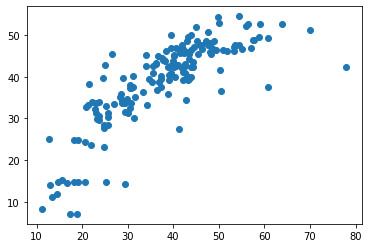

In [15]:
plt.scatter(y_test, predictions)


In [ ]:
# Looks like the accuracy is not wonderful just by eyeballing it, but you can also quantify it a number of different ways.

# Accuracy Score

In [16]:
# The first way is to print an accuracy score for this model. Place the .score() function inside the
# print() function with an argument of your testing data to get it:

print("Score:", lm.score(x_test, y_test))

Score: 0.6442380845121868


In [ ]:
# This means your model is accurate approximately 64% of the time, which is not too shabby in the real world.

# Examining Error


In [ ]:
# The next way to determine model fit is to look at the error terms. This is just another way to quantify 
# the residuals - how close is your predicted data from the real data? There are many different mathematical 
# ways to examine error, but you will look at mean absolute error (MAE), mean squared error (MSE) and root mean 
# squared error (RMSE). There are no cut-off values when interpreting error scores, because each model with 
# different variables and different units for those variables will generate radically different error values. 
# The main thing to know about interpreting error is that the smaller the error value, the better, and they range 
# from zero to infinity. You want as close to zero as you can get.



# - Mean Absolute Error (MAE)

In [17]:
# This is exactly what it sounds like - the average amount of error between the prediction and the real data.
# It's a nice one to use because it's pretty simple to understand. To get it, utilize the metrics package from 
# sklearn and the mean_absolute_error() function:

metrics.mean_absolute_error(y_test, predictions)

# You'll place as arguments y_test and predictions, because these are the things you are comparing to get error. 
# Here is the resulting statistic:

5.550201321415231

In [ ]:
# Since the lowest you can have is 0, a value of 5.55 is pretty good!

# - Mean Squared Error (MSE)

In [18]:
# This is the square of the absolute error from above. It's a good one to use because it takes into account
# large amounts of error, which often happens in the real world. You'll get it with the mean_squared_error() 
# function from the sklearn metrics package:

metrics.mean_squared_error(y_test, predictions)

54.37572854491987

In [ ]:
# Note that because it is squared, it comes out much larger than the mean absolute error.

# - Root Mean Squared Error (RMSE)

In [19]:
# This one is the square root of the mean squared error you saw above. It is probably the most popular.
# You will need to utilize the numpy sqrt() function to get the square root of the mean_squared_error() 
# function you used above:

np.sqrt(metrics.mean_squared_error(y_test, predictions))


7.373990001682934

In [ ]:
# Again, this model fits decently well - 7 is pretty close to zero! That is not to say that there aren't better
# fitting models for this data out there - there very well might be! 

# k-Fold Cross Validation in Python


In [20]:
# Import Packages

# You will need from sklearn.model_selection the packages for KFold and for cross_val_score.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Load in Data

In [ ]:
# Will use the same data as above - realestate

In [ ]:
# Goal
# With the above data, your goal is to accurately predict housing prices. 
# To ensure this is the most accurate and rigorous model, you will be cross-validating it using the k-folds method.



# Create the Folds

In [25]:
# You will use the KFold() function to create your different training and test sets.
# By inputting the 3, you have chosen to have 3 iterations, a good number given the small number of cases in your
# dataset. Then the argument True means that you want your data to be shuffled. Lastly, if you choose to 
# shuffle your data, then you can specify the randomization version - just like with train_test_split().
# If you were doing this on your own, it wouldn't matter, but since you are following along, and you want your
# numbers to be the same, specify the 1 as done here so that everyone ends up with the same randomization.

kfold = KFold(n_splits = 3, shuffle=True, random_state=1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))


train: [  0   1   2   3   7   8   9  10  14  15  16  19  20  21  22  24  25  26
  28  30  31  32  33  34  35  36  37  38  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  60  63  64  66  68  70  71  72  74  75
  76  77  79  83  84  86  87  88  94  96  97  99 100 103 104 105 108 109
 110 111 112 113 114 115 116 118 121 123 124 126 128 129 130 131 133 134
 135 136 137 138 140 141 142 143 144 145 147 148 149 150 151 152 153 154
 155 156 157 158 160 163 166 167 168 169 170 174 175 176 177 178 181 182
 183 184 188 190 193 194 195 196 197 198 199 200 201 202 203 205 206 208
 209 210 212 215 216 217 219 220 221 222 224 225 226 227 229 231 234 235
 236 237 239 240 241 243 246 248 249 250 251 252 253 254 255 258 259 260
 262 263 264 265 266 267 269 275 276 277 278 279 280 281 282 283 284 285
 287 288 290 293 296 297 301 302 303 305 306 307 308 309 310 313 315 316
 317 318 319 321 324 326 327 328 331 333 334 335 336 339 340 342 343 344
 345 347 349 352 353 354 355 356 357 358 359

In [26]:
# The ability to run something cross-validated is already built into sklearn.
# If you were to do this the long way, you would use these printed index lists and drop rows from your 
# column to make six separate data sets, 3 for training and three for testing, and then use the above model 
# code to test each set of train and test data and then average together. Sounds long and time consuming, right? 
# Well, luckily it’s as simple as one line of code with sklearn:

print(cross_val_score(lm, x,y, cv=3))

[0.62051774 0.50393467 0.55970703]


In [ ]:
# You’ll notice that these scores vary somewhat. That is to be expected. Looks like the first trained model was 
# accurate 62% of the time, while the second model was accurate 50% of the time and the third model was accurate 
# 56% of the time.

# Using cross-validation, your model has now been thoroughly tested, and you should feel secure in your knowledge
# that you have created a rigorous model that has stood up to some serious testing! You also have a better idea of 
# how the accuracy might vary.